<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Обзор данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Подготовка-признаков" data-toc-modified-id="Подготовка-признаков-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Подготовка признаков</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Нам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Необходимо построить модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Важно не забыть проверить *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

**Описание данных**

Признаки:
- `RowNumber` — индекс строки в данных
- `CustomerId` — уникальный идентификатор клиента
- `Surname` — фамилия
- `CreditScore` — кредитный рейтинг
- `Geography` — страна проживания
- `Gender` — пол
- `Age` — возраст
- `Tenure` — сколько лет человек является клиентом банка
- `Balance` — баланс на счёте
- `NumOfProducts` — количество продуктов банка, используемых клиентом
- `HasCrCard` — наличие кредитной карты
- `IsActiveMember` — активность клиента
- `EstimatedSalary` — предполагаемая зарплата

Целевой признак:
- `Exited` — факт ухода клиента

**Цель проекта**


Решить задачу бинарной классификации. Построить модель машинного обучения, предсказывающую уйдет ли клиент из банка в ближайшее время или нет. Значение *F1*-меры должно быть не менее 0.59.

**Ход проекта**

Данные о с информацией о клиентах получены из файла `Churn.csv`. О качестве данных ничего не известно. Поэтому перед проверкой зависимостей понадобится обзор данных. Затем, на этапе предобработки исправить самые критичные ошибки данных, если они есть. После нужно построить модель машинного обучения, выдующую необходимое значение *F1*-меры.

Таким образом, решение пройдёт в пять этапов:

1. Подготовка данных.
2. Исследование задачи.
3. Борьба с дисбалансом.
4. Тестирование модели.
5. Общий вывод.

## Подготовка данных

### Обзор данных

In [1]:
import warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_curve, roc_auc_score
from sklearn.utils import shuffle

In [2]:
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('Churn.csv')
data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


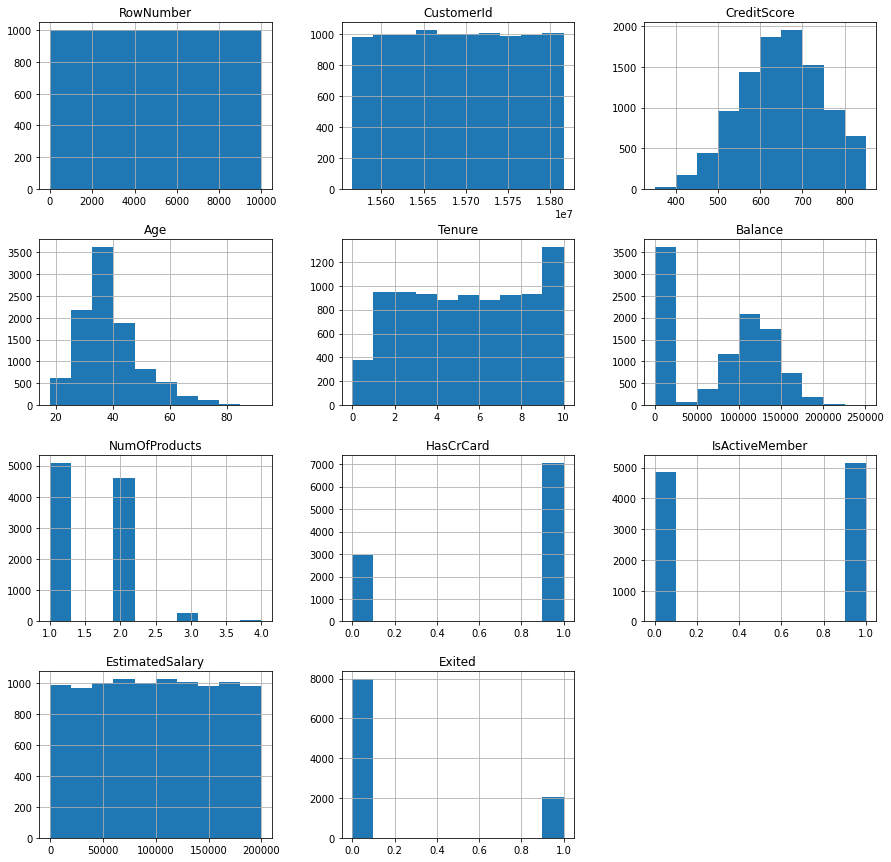

In [5]:
data.hist(figsize=(15, 15));

In [6]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
data.describe(include=['object'])

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


In [8]:
data.duplicated().sum()

0

В столбцах используются корректные типы данных, дубликатов нет, однако в одном из столбцов есть пропущенные данные. Прежде, чем приступать к построению модели, необходима предварительная обработка данных.

### Предобработка данных

Для начала переведем названия стобцов в *snake_case*, поскольку в Python принято использовать данный формат.

In [9]:
data.columns = ['row_number', 'customer_id', 'surname', 'credit_score', 'geography',
                'gender', 'age', 'tenure', 'balance', 'num_of_products', 'has_card',
                'is_active', 'estimated_salary', 'exited']
data.columns

Index(['row_number', 'customer_id', 'surname', 'credit_score', 'geography',
       'gender', 'age', 'tenure', 'balance', 'num_of_products', 'has_card',
       'is_active', 'estimated_salary', 'exited'],
      dtype='object')

Посомтрим на пропуски в `tenure`.

In [10]:
data[data['tenure'].isna()]

,row_number,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_card,is_active,estimated_salary,exited
30,31,15589475,Azikiwe,591,Spain,Female,39,NaN,0.00,3,1,0,140469.38,1
48,49,15766205,Yin,550,Germany,Male,38,NaN,103391.38,1,0,1,90878.13,0
51,52,15768193,Trevisani,585,Germany,Male,36,NaN,146050.97,2,0,0,86424.57,0
53,54,15702298,Parkhill,655,Germany,Male,41,NaN,125561.97,1,0,0,164040.94,1
60,61,15651280,Hunter,742,Germany,Male,35,NaN,136857.00,1,0,0,84509.57,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9944,9945,15703923,Cameron,744,Germany,Male,41,NaN,190409.34,2,1,1,138361.48,0
9956,9957,15707861,Nucci,520,France,Female,46,NaN,85216.61,1,1,0,117369.52,1
9964,9965,15642785,Douglas,479,France,Male,34,NaN,117593.48,2,0,0,113308.29,0
9985,9986,15586914,Nepean,659,France,Male,36,NaN,123841.49,2,1,0,96833.00,0


В данном столбце **909** пропусков, это слишком много, чтобы их просто исключить из выборки. Поскольку на основе других столбцов мы не можем заполнить данные пропуски, то заполним их медианным значением.

In [11]:
data.loc[data['tenure'].isna(), 'tenure'] = data['tenure'].median()
len(data[data['tenure'].isna()])

0

Проблемы в данных устранены. Далее нужно подготовить признаки, чтобы алгоритмы машинного обучния смогли их корректно обработать.

### Подготовка признаков

Для начала исключим из датафрейма `row_number` и `surname`, чтобы они не мешали модели обучаться. Это просто изыбыточные идентификационные данные, которые не могут влиять на факт ухода клиента.

In [12]:
data = data.drop(['row_number', 'surname'], axis=1)
data.columns

Index(['customer_id', 'credit_score', 'geography', 'gender', 'age', 'tenure',
       'balance', 'num_of_products', 'has_card', 'is_active',
       'estimated_salary', 'exited'],
      dtype='object')

Так же из таблицы можно удалить `customer_id`, если заменить индексы строк этим параметром. Проверим, этот идентификатор на уникальность.

In [13]:
len(data[data.duplicated(subset='customer_id', keep=False)])

0

В датафрейме нет дублирующих идентификаторов, заманим индексы таблицы на них.

In [14]:
data.index = data['customer_id']
data = data.drop('customer_id', axis=1)
data.head()

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_card,is_active,estimated_salary,exited
customer_id,,,,,,,,,,,
15634602,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
15647311,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
15619304,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
15701354,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
15737888,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


Разделим датафрейм на обучающую, валидационную и тестовую выборки.

In [17]:
features = data.drop('exited', axis=1)
target = data['exited']
print(data.shape)
print(features.shape)
print(target.shape)

(10000, 11)
(10000, 10)
(10000,)


In [18]:
features_train, features_valid_test, target_train, target_valid_test = train_test_split(
    features, target, test_size=0.4, random_state=12345)

features_valid, features_test, target_valid, target_test = train_test_split(
    features_valid_test, target_valid_test, test_size=0.5, random_state=12345)

print('Размер тренировчной выборки:', features_train.shape)
print('Размер валидационной выборки:', features_valid.shape)
print('Размер тестовой выборки:', features_test.shape)

Размер тренировчной выборки: (6000, 10)
Размер валидационной выборки: (2000, 10)
Размер тестовой выборки: (2000, 10)


Выполним кодирование категориальных признаков техникой прямого кодирования.

Обучим трансформер OneHotEncoder на тренировочных данных.

In [19]:
categorial = ['geography', 'gender']
enc = OneHotEncoder(drop='first')
enc.fit(features_train[categorial])
enc.categories_

[array(['France', 'Germany', 'Spain'], dtype=object),
 array(['Female', 'Male'], dtype=object)]

Проверим новые названия столбцов для закодированных признаков.

In [20]:
features_labels = enc.get_feature_names()
features_labels

array(['x0_Germany', 'x0_Spain', 'x1_Male'], dtype=object)

Применим метод transform к тренировочным данным, чтобы получить значения закодированных признаков. Создадим датафрейм из закодированных признаков.

In [21]:
features_array_train = enc.transform(features_train[categorial]).toarray()
enc_features_train = pd.DataFrame(data=features_array_train, columns=features_labels, index=features_train.index)
enc_features_train.head()

,x0_Germany,x0_Spain,x1_Male
customer_id,,,
15671987,0.0,1.0,1.0
15815628,0.0,0.0,0.0
15799494,1.0,0.0,1.0
15711288,0.0,0.0,1.0
15699492,1.0,0.0,0.0


Получим результирующий датафрейм для обучения, объединив его с закодированными признаками и исключив из него незакодированные данные.

In [22]:
features_train = pd.concat([features_train, enc_features_train], axis=1)
features_train = features_train.drop(categorial, axis=1, errors='ignore')
features_train.head()

,credit_score,age,tenure,balance,num_of_products,has_card,is_active,estimated_salary,x0_Germany,x0_Spain,x1_Male
customer_id,,,,,,,,,,,
15671987,567,35,8.0,153137.74,1,1,0,88659.07,0.0,1.0,1.0
15815628,711,37,8.0,113899.92,1,0,0,80215.20,0.0,0.0,0.0
15799494,850,44,3.0,140393.65,2,0,1,186285.52,1.0,0.0,1.0
15711288,512,24,6.0,0.00,2,1,0,37654.31,0.0,0.0,1.0
15699492,665,27,2.0,147435.96,1,0,0,187508.06,1.0,0.0,0.0


Применим метод transform к валидационным данным, чтобы получить значения закодированных признаков. Сформируем промежуточный валидационный датафрейм.

In [23]:
features_array_valid = enc.transform(features_valid[categorial]).toarray()
enc_features_valid = pd.DataFrame(data=features_array_valid, columns=features_labels, index=features_valid.index)
features_valid = pd.concat([features_valid, enc_features_valid], axis=1)
features_valid = features_valid.drop(categorial, axis=1, errors='ignore')
features_valid.head()

,credit_score,age,tenure,balance,num_of_products,has_card,is_active,estimated_salary,x0_Germany,x0_Spain,x1_Male
customer_id,,,,,,,,,,,
15780805,585,35,2.0,0.00,2,1,0,98621.04,0.0,0.0,0.0
15649853,625,45,3.0,0.00,1,1,1,184474.15,0.0,0.0,0.0
15714970,667,32,0.0,103846.65,1,1,0,20560.69,1.0,0.0,1.0
15593178,568,36,10.0,153610.61,1,1,1,54083.80,0.0,1.0,0.0
15736399,606,42,10.0,0.00,2,1,0,177938.52,0.0,1.0,1.0


Проведем аналогичную работу для тестовой выборки.

In [24]:
features_array_test = enc.transform(features_test[categorial]).toarray()
enc_features_test = pd.DataFrame(data=features_array_test, columns=features_labels, index=features_test.index)
features_test = pd.concat([features_test, enc_features_test], axis=1)
features_test = features_test.drop(categorial, axis=1, errors='ignore')
features_test.head()

,credit_score,age,tenure,balance,num_of_products,has_card,is_active,estimated_salary,x0_Germany,x0_Spain,x1_Male
customer_id,,,,,,,,,,,
15753591,438,38,2.0,0.00,2,1,0,136859.55,0.0,0.0,1.0
15606158,644,39,9.0,0.00,1,1,0,3740.93,0.0,0.0,0.0
15765257,564,31,5.0,121461.87,1,1,1,20432.09,0.0,1.0,1.0
15731246,628,40,10.0,0.00,2,1,0,103832.58,0.0,1.0,1.0
15713599,728,30,10.0,114835.43,1,0,1,37662.49,0.0,0.0,1.0


Масштабируем количественные признаки с помощью стандартизации.

Обучим трансформер StandardScaler на тренировочных данных.

In [25]:
numeric = ['credit_score', 'age', 'tenure', 'balance', 'num_of_products', 
           'has_card', 'is_active', 'estimated_salary']
scaler = StandardScaler()
scaler.fit(features_train[numeric])
scaler.scale_

array([9.62944480e+01, 1.05370341e+01, 2.74729362e+00, 6.21139214e+04,
       5.80817216e-01, 4.54758513e-01, 4.99279453e-01, 5.77397775e+04])

Применим метод transform к тренировочным данным, чтобы получить значения стандаритизированных признаков.

In [26]:
features_train[numeric] = scaler.transform(features_train[numeric])
features_train.head()

,credit_score,age,tenure,balance,num_of_products,has_card,is_active,estimated_salary,x0_Germany,x0_Spain,x1_Male
customer_id,,,,,,,,,,,
15671987,-0.886751,-0.373192,1.082277,1.232271,-0.891560,0.642466,-1.055187,-0.187705,0.0,1.0,1.0
15815628,0.608663,-0.183385,1.082277,0.600563,-0.891560,-1.556504,-1.055187,-0.333945,0.0,0.0,0.0
15799494,2.052152,0.480939,-0.737696,1.027098,0.830152,-1.556504,0.947699,1.503095,1.0,0.0,1.0
15711288,-1.457915,-1.417129,0.354288,-1.233163,0.830152,0.642466,-1.055187,-1.071061,0.0,0.0,1.0
15699492,0.130961,-1.132419,-1.101690,1.140475,-0.891560,-1.556504,-1.055187,1.524268,1.0,0.0,0.0


Применим метод transform к валидационным данным, чтобы получить значения закодированных признаков. Сформируем итоговый валидационный датафрейм.

In [27]:
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_valid.head()

,credit_score,age,tenure,balance,num_of_products,has_card,is_active,estimated_salary,x0_Germany,x0_Spain,x1_Male
customer_id,,,,,,,,,,,
15780805,-0.699824,-0.373192,-1.101690,-1.233163,0.830152,0.642466,-1.055187,-0.015173,0.0,0.0,0.0
15649853,-0.284431,0.575842,-0.737696,-1.233163,-0.891560,0.642466,0.947699,1.471724,0.0,0.0,0.0
15714970,0.151731,-0.657902,-1.829679,0.438711,-0.891560,0.642466,-1.055187,-1.367107,1.0,0.0,1.0
15593178,-0.876366,-0.278288,1.810266,1.239884,-0.891560,0.642466,0.947699,-0.786517,0.0,1.0,0.0
15736399,-0.481743,0.291132,1.810266,-1.233163,0.830152,0.642466,-1.055187,1.358533,0.0,1.0,1.0


Проведем аналогичную работу для тестовой выборки.

In [28]:
features_test[numeric] = scaler.transform(features_test[numeric])
features_test.head()

,credit_score,age,tenure,balance,num_of_products,has_card,is_active,estimated_salary,x0_Germany,x0_Spain,x1_Male
customer_id,,,,,,,,,,,
15753591,-2.226392,-0.088482,-1.101690,-1.233163,0.830152,0.642466,-1.055187,0.647083,0.0,0.0,1.0
15606158,-0.087120,0.006422,1.446272,-1.233163,-0.891560,0.642466,-1.055187,-1.658410,0.0,0.0,0.0
15765257,-0.917905,-0.752805,-0.009707,0.722307,-0.891560,0.642466,0.947699,-1.369334,0.0,1.0,1.0
15731246,-0.253277,0.101325,1.810266,-1.233163,0.830152,0.642466,-1.055187,0.075086,0.0,1.0,1.0
15713599,0.785204,-0.847708,1.810266,0.615625,-0.891560,-1.556504,0.947699,-1.070919,0.0,0.0,1.0


**Вывод**

В каждой строке таблицы — данные о поведении клиентов и расторжении договоров с банком. Исходные данные уже были неплохого качества, однако нуждались в некоторой предобработке и подготовке. Мы подготовили данные, и теперь можно приступать к построению модели.

In [29]:
data.describe()

,credit_score,age,tenure,balance,num_of_products,has_card,is_active,estimated_salary,exited
count,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,4.99790,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.76001,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.00000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.00000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.00000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.00000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.00000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## Исследование задачи

Обучим модель логистической регрессии.

In [476]:
model_lr = LogisticRegression(solver='liblinear', random_state=12345)
model_lr.fit(features_train, target_train)
predicted_valid = model_lr.predict(features_valid)
f1_valid = f1_score(predicted_valid, target_valid)

probabilities_valid = model_lr.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
roc_auc =  roc_auc_score(target_valid, probabilities_one_valid)

print('F1-мера логистической регрессии:', f1_valid)
print('ROC-AUC логистической регрессии:', roc_auc)

F1-мера логистической регрессии: 0.33108108108108103
ROC-AUC логистической регрессии: 0.7587588238496482


Значение *F1*-меры равняется **0.331**. Это слишком низкий показатель, попробуем добиться большего от логистическое регрессии, меняя пороговое значение.

In [457]:
probabilities_valid = model_lr.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

for threshold in np.arange(0, 0.4, 0.02):
    predicted_valid = probabilities_one_valid > threshold 
    f1_valid = f1_score(predicted_valid, target_valid) 

    print('Порог = {:.2f} | F1-мера = {:.3f}'.format(
        threshold, f1_valid))

Порог = 0.00 | F1-мера = 0.346
Порог = 0.02 | F1-мера = 0.348
Порог = 0.04 | F1-мера = 0.368
Порог = 0.06 | F1-мера = 0.391
Порог = 0.08 | F1-мера = 0.405
Порог = 0.10 | F1-мера = 0.423
Порог = 0.12 | F1-мера = 0.444
Порог = 0.14 | F1-мера = 0.465
Порог = 0.16 | F1-мера = 0.468
Порог = 0.18 | F1-мера = 0.484
Порог = 0.20 | F1-мера = 0.478
Порог = 0.22 | F1-мера = 0.484
Порог = 0.24 | F1-мера = 0.498
Порог = 0.26 | F1-мера = 0.502
Порог = 0.28 | F1-мера = 0.488
Порог = 0.30 | F1-мера = 0.484
Порог = 0.32 | F1-мера = 0.472
Порог = 0.34 | F1-мера = 0.461
Порог = 0.36 | F1-мера = 0.445
Порог = 0.38 | F1-мера = 0.424


Перебирая пороговые значения, удалось выяснить, что оптимальным порогом будет значение **0.26**. При нём значение F1-меры достигает **0.502**. Уже гораздо лучше. Проверим, каких показателей нам получится добиться используя случайный лес.

Обучим модель случайного леса.

In [478]:
model_forest = RandomForestClassifier(random_state=12345)
model_forest.fit(features_train, target_train)
predicted_valid = model_forest.predict(features_valid)
f1_valid = f1_score(predicted_valid, target_valid)

probabilities_valid = model_forest.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
roc_auc =  roc_auc_score(target_valid, probabilities_one_valid)

print('F1-мера случайного леса:', f1_valid)
print('ROC-AUC случайного леса:', roc_auc)

F1-мера случайного леса: 0.5769805680119582
ROC-AUC случайного леса: 0.840733672475638


Не оптимальный случайный лес уже показывает более высокое значение *F1*-меры: **0.577**. Кроме того, метрика *ROC-AUC* выросла до **0.841**. Попробуем улучшить модель с помощью перебора гиперпараметров.

In [479]:
best_model_forest = None
best_result_forest = 0
best_depth_forest = 0
best_est = 0
for est in range(1, 100, 10):
    for depth in range(1, 40, 2): 
        model_forest = RandomForestClassifier(random_state=12345, n_estimators = est, max_depth = depth)
        model_forest.fit(features_train, target_train)
        predictions = model_forest.predict(features_valid)
        result = f1_score(target_valid, predictions)
        if result > best_result_forest:
            best_result_forest = result
            best_model_forest = model_forest
            best_depth_forest = depth
            best_est = est

probabilities_valid = best_model_forest.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
roc_auc =  roc_auc_score(target_valid, probabilities_one_valid)

print('F1-мера лучшей модели:', best_result_forest)
print('Максимальная глубина:', best_depth_forest)
print('Количество деревьев:', best_est)
print('ROC-AUC лучшей модели:', roc_auc)

F1-мера лучшей модели: 0.5901162790697674
Максимальная глубина: 23
Количество деревьев: 31
ROC-AUC лучшей модели: 0.8334288557274119


Перебирая гиперпараметры, удалось установить, что оптимальными являются следующие значения. Максимальная глубина дерева — **23**, количество деревьев — **31**. При данных гиперпараметрах значение *F1*-меры становится **0.590**. Однако значение *ROC-AUC* уменьшилось до **0.833**.

**Вывод**

Исследовав различные модели машинного обучения, удалось поулчить следующие результаты. Максимальный показатель метрики *F1*, которого мы смогли добиться, обучая модель логистической регрессии, равняется **0.502**. Обучая случайны лес, удалось достичь более высокого показателя *F1*-меры:  **0.590**. Поробуем улучшить значение данной метрики, поработав с балансом классов.

## Борьба с дисбалансом

Посомтрим, сколько объектов каждого класса в целевом признаке.

In [460]:
target_train.value_counts()

0    4804
1    1196
Name: exited, dtype: int64

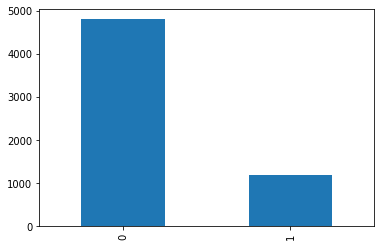

In [461]:
target_train.value_counts().plot(kind='bar', grid=False);

Объектов класса "0" практически в 4 раза больше, чем объектов класса "1". Сбалансируем классы, увеличив количество объектов положительного класса.

In [462]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)
target_upsampled.value_counts()

0    4804
1    4784
Name: exited, dtype: int64

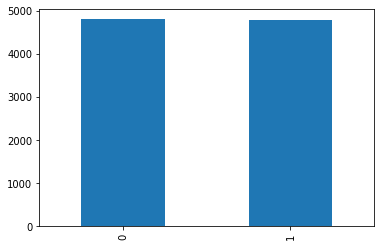

In [463]:
target_upsampled.value_counts().plot(kind='bar', grid=False);

Теперь в каждом классе примерно одинаковое количество объектов. Проверим значение *F1*-меры логистической регресии после балансировки классов.

In [480]:
model_lr = LogisticRegression(solver='liblinear', random_state=12345)
model_lr.fit(features_upsampled, target_upsampled)
predicted_valid = model_lr.predict(features_valid)
f1_valid = f1_score(predicted_valid, target_valid)

probabilities_valid = model_lr.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
roc_auc =  roc_auc_score(target_valid, probabilities_one_valid)

print('F1-мера логистической регрессии:', f1_valid)
print('ROC-AUC логистической регрессии:', roc_auc)

F1-мера логистической регрессии: 0.4888507718696398
ROC-AUC логистической регрессии: 0.76357526963023


Значения все еще значительно меньше, чем у случайного леса. Построим модель случайного леса с оптимальными гиперпараметрами.

In [482]:
best_model_forest = None
best_result_forest = 0
best_depth_forest = 0
best_est = 0
for est in range(1, 100, 10):
    for depth in range(1, 40, 2): 
        model_forest = RandomForestClassifier(random_state=12345, n_estimators = est, max_depth = depth)
        model_forest.fit(features_upsampled, target_upsampled)
        predictions = model_forest.predict(features_valid)
        result = f1_score(target_valid, predictions)
        if result > best_result_forest:
            best_result_forest = result
            best_model_forest = model_forest
            best_depth_forest = depth
            best_est = est
            
probabilities_valid = best_model_forest.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
roc_auc =  roc_auc_score(target_valid, probabilities_one_valid)

print('F1-мера лучшей модели:', best_result_forest)
print('Максимальная глубина:', best_depth_forest)
print('Количество деревьев:', best_est)
print('ROC-AUC лучшей модели:', roc_auc)

F1-мера лучшей модели: 0.6291179596174282
Максимальная глубина: 9
Количество деревьев: 71
ROC-AUC лучшей модели: 0.85292374137274


Перебирая гиперпараметры, удалось установить, что самыми оптимальными являются следующие значения. Максимальная глубина дерева — **71**, количество деревьев — **9**. При данных гиперпараметрах значение *F1*-меры становится **0.629**. Значение *ROC-AUC* также выросло и состовляет **0.853**.

Проверим, улучшатся ли значения *F1*-меры, если мы мы будем решать проблему дисбаланса классов, уменьшая количество объектов отрицательного класса.

In [466]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)
target_downsampled.value_counts()

0    1201
1    1196
Name: exited, dtype: int64

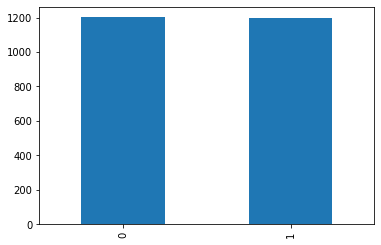

In [467]:
target_downsampled.value_counts().plot(kind='bar', grid=False);

Теперь в каждом классе примерно одинаковое количество объектов. Проверим значение F1-меры логистической регресии после балансировки классов.

In [481]:
model_lr = LogisticRegression(solver='liblinear', random_state=12345)
model_lr.fit(features_downsampled, target_downsampled)
predicted_valid = model_lr.predict(features_valid)
f1_valid = f1_score(predicted_valid, target_valid)

probabilities_valid = model_lr.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
roc_auc =  roc_auc_score(target_valid, probabilities_one_valid)

print('F1-мера логистической регрессии:', f1_valid)
print('ROC-AUC логистической регрессии:', roc_auc)

F1-мера логистической регрессии: 0.48406546080964685
ROC-AUC логистической регрессии: 0.7621356286936165


Значение *F1*-меры и *ROC-AUC* практически не изменилось от применения другого способа балансировки классов. Построим модель случайного леса с оптимальными гиперпараметрами.

In [483]:
best_model_forest = None
best_result_forest = 0
best_depth_forest = 0
best_est = 0
for est in range(1, 50, 5):
    for depth in range(1, 40, 2):
        model_forest = RandomForestClassifier(random_state=12345, n_estimators = est, max_depth = depth)
        model_forest.fit(features_downsampled, target_downsampled)
        predictions = model_forest.predict(features_valid)
        result = f1_score(target_valid, predictions)
        if result > best_result_forest:
            best_result_forest = result
            best_model_forest = model_forest
            best_depth_forest = depth
            best_est = est
            
probabilities_valid = best_model_forest.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
roc_auc =  roc_auc_score(target_valid, probabilities_one_valid)

print('F1-мера лучшей модели:', best_result_forest)
print('Максимальная глубина:', best_depth_forest)
print('Количество деревьев:', best_est)
print('ROC-AUC лучшей модели:', roc_auc)

F1-мера лучшей модели: 0.6017357762777242
Максимальная глубина: 5
Количество деревьев: 36
ROC-AUC лучшей модели: 0.8445339011244926


Максимальное значение *F1*-мера, которого удалось добиться равняется **0.602**. Данный способ борьбы с дисбалансом показал более худшее значение *F1*-меры, чем предыдущий. Все-таки для данной задачи лучше устранить дисбаланс с помощью *upsampling*.

**Вывод**

В данном разделе мы применили несколько способов борьбы с дисбаланом классов в целевом признаке: *upsampling* и *downsampling*. Для каждого из способов мы обучили несколько моделей, проанализировали значение метрики *F1* на валидационных данных и выяснили, какая модель показывает наилучшие результаты. Лучшей оказалось модель случайного леса, которой на вход передали признаки, сбалансированные техникой *upsampling*, и со следующими гиперпараметрами. Максимальная глубина дерева — **71**, количество деревьев — **9**. При данных гиперпараметрах значение *F1*-меры становится **0.629**, а значение *ROC-AUC* выросло до **0.853**.  Именно эту модель будем использовать в дальнейшем для проверки на тестовых данных.

## Тестирование модели

Заново обучим финальную модель и выполним проверку на тестовых данных.

In [470]:
final_model = RandomForestClassifier(random_state=12345, n_estimators = 71, max_depth = 9)
final_model.fit(features_upsampled, target_upsampled)
predicted_test = final_model.predict(features_test)
f1_test = f1_score(predicted_test, target_test)
accuracy = accuracy_score(predicted_test, target_test)

print('F1-мера финальной модели:', f1_test)
print('Accuracy финальной модели:', accuracy)

F1-мера финальной модели: 0.6064382139148494
Accuracy финальной модели: 0.8105


Значение *F1*-меры равняется **0.61**, мы достигли необходимого показателя данной метрики. *Accuracy* нашей модели равняется **0.81**, то есть наша модель верно предсказывает уход клиента из банка в 81% случаев. Из-за того, что в нашей выборке 75% клиентов остаётся с банком, мы можем просто каждого клиента классифицировать значением 0 (т.е. про каждого нового клиента говорить, что он останется с банком), и такая модель будет верно предсказывать поведение клиента в примерно 75% случаев. Такая модель и правда не слишком адекватна. Но наша модель выдаёт верные предсказания чаще, чем в 75% случаев, а значит она совершеннее самой элементарной модели, и наша работа была проделана не зря.

Построим *ROC*-кривую и выясним значение *ROC-AUC*, чтобы понять, как сильно наша модель отличается от случайной.

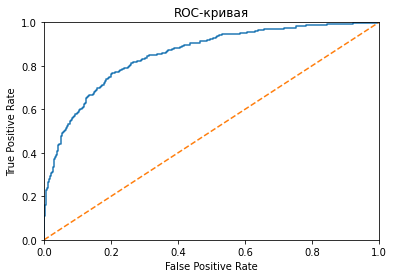

In [471]:
probabilities_test = final_model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test) 

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-кривая")
plt.show()

In [473]:
auc_roc =  roc_auc_score(target_test, probabilities_one_test)
auc_roc

0.8533709305306332

Судя по графику и значению *ROC-AUC* в **0.85**, наша модель совершает предсказания гораздо лучше случайной модели. Для случайной модели значение данной метрики равняется **0.5**.

## Общий вывод

В ходе исследования мы провели работу для прогнозирования, уйдёт ли клиент из банка в ближайшее время или нет. 

Исследуя данные, мы:
1. Обработали и подготовили датафрейм для применения методов машинного обучения.
2. Посторили такие модели машинного обучения, как случайный лес, логистическая регрессия без учёта дисбаланса.
3. Обучили модели случайного леса и логистической регрессии, уже устранив дисбаланс классов, и подобрали гиперпараметры для достижения предельно большого значения *F1*-меры. Наилучшей на валидационной выборке оказалось модель случайного леса, которой на вход передали признаки, сбалансированные техникой *upsampling*, и со следующими гиперпараметрами. Максимальная глубина дерева — **71**, количество деревьев — **9**. При данных гиперпараметрах значение *F1*-меры становится **0.63**, а значение *ROC-AUC* равняется **0.853**. Данную модель выбрали в качестве итоговой.
4. Повторно обучили итоговую модель, проверили её на тестовых данных. В результате получили следующие итоговые значения метрик: *F1*-мера — **0.61**, *accuracy* —  **0.81**, *AUC-ROC* — **0.85**. Полученные значения демонстрируют, что мы успешно справились с задачей и преодолели необходимый порог по метрике *F1* в **0.59**.